## Introduction

This is a case study for the Google Data Analytics Professional Certificate Capstone Project. I have chosen case study 2, featuring the Bellabeat company and its suite of healthy lifestyle smart devices. The case study follows the Act, Prepare, Process, Analyze, Share, Act methodology tought throughout the program.

#### Background

Bellabeat is a fast rising health and wellness company focusing on using smart devices to help women maintain a healthy lifestyle. Co-founder and Chief Creative Officer Ursa Srsen believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. She wants the potential insights gained from analysis to form the foundation for a marketing strategy for one of Bellabeat's many smart devices and products. 

#### Main Problem

How do users utilize their smart devices and what can Bellabeat do to make that better?

#### Business Task

This analysis will seek to:
* Identify trends and patterns in smart device usage to better understand how consumers are using their Bellabeat products.
* Use those trends and patterns to generate marketing insights for one particular Bellabeat product. 

## About the Data

#### Does it ROCCC?

The ROCCC method of determining data credibility focuses on five key aspects of data credibility: Reliability, Originality, Comprehensiveness, Currentness, and Cited. Let's apply it to data used in this analysis.

##### Reliability

The data used for this analysis is the FitBit Tracker Data from Kaggle, posted by user Mobius. It is licensed by CC0: Public Domain, making it a reputable source of information. The data was collected via a survey of 30 people over a period of one month. Overall, the data is reliable based on these standards.

##### Originality

The data was collected by Amazon Mechanical Turk, a third-party data source. Since the data was not collected by Fitbit itself, the data cannot be called original.

##### Comprehensiveness

The data itself is made of 18 csv files, 15 in long format and 3 in wide format. It measures various metrics, such as steps taken and calories burned, at daily, hourly, and minute by minute rates. However, the data only comprises of 30 individuals over 30 days of usage. That is not a large enough sample of smart device users to make an effective assumption of any trends and insights gained. The data is also missing key information such as the age and gender of the participants. As wellness company focused on women, it would be much more useful to analyze women's trends in smart device usage. Due to these issues, we cannot say the data is comprehensive.

##### Currentness

The data was collected in 2016, a full 6 years ago now. Trends and lifestyles can change within that span of time, especially in light of the COVID-19 pandemic. Insights gained from analysis might not be accurate when applied to present day activity trends. We cannot say the data is current.

##### Cited
The data has been cited as Fitbit user data from Amazon Mechanical Turk, so we can say the data is cited.

## Process the Data

For this analysis, I will be using the R statistical programming language for data cleaning, analysis, and visualization

## Installing and Loading Packages

For the data cleaning and analysis, I will mainly be using the core `tidyverse` suite (mostly `dplyr`, `readr`, and `ggplot2`). I will also be loading in the `skimr`, `janitor`, and `lubridate` packages, as they provide many key features for data cleaning that may come in handy.

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Importing the Data

Let's use readr to import the data we'll be using. After skimming all the csv files, I've narrowed down the list to six csv files that I think contain the most pertinent data. 

In [2]:
daily_activity <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_calories <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
sleep_day <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

## Overview of Data

Now its time to take a cursory glance at the data within our dataframes and see how accurately the data was imported.

In [3]:
print("Daily Activity")
head(daily_activity)

print("Hourly Calories")
head(hourly_calories)

print("Hourly Intensities")
head(hourly_intensities)

print("Hourly Steps")
head(hourly_steps)

print("Sleep Day")
head(sleep_day)

print("Weight Log Info")
head(weight_log)

[1] "Daily Activity"


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Hourly Calories"


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


[1] "Hourly Intensities"


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


[1] "Hourly Steps"


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


[1] "Sleep Day"


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Weight Log Info"


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [4]:
print("Daily Activity")
glimpse(daily_activity)

print("Hourly Calories")
glimpse(hourly_calories)

print("Hourly Intensities")
glimpse(hourly_intensities)

print("Hourly Steps")
glimpse(hourly_steps)

print("Sleep Day")
glimpse(sleep_day)

print("Weight Log Info")
glimpse(weight_log)

[1] "Daily Activity"
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 2

We can see already that all of the date columns in our data frames are date or datetime format, so that will have to be changed. But first, let's check for more glaring issues, such as nulls and duplicate rows.

## Checking for Nulls and Duplicates

First let's check for null values in the dataframes. Nulls will impede accurate analysis so its best to remove them when possible.

In [5]:
daily_activity %>%
    is.null() %>%
        sum()

hourly_calories %>%
    is.null() %>%
        sum()

hourly_intensities %>%
    is.null() %>%
        sum()

hourly_steps %>%
    is.null() %>%
        sum()

sleep_day %>%
    is.null() %>%
        sum()

weight_log %>%
    is.null() %>%
        sum()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Great, there are no null values throughout all dataframes. Let's check for duplicated rows next.

In [6]:
daily_activity %>%
    duplicated() %>%
        sum()

hourly_calories %>%
    duplicated() %>%
        sum()

hourly_intensities %>%
    duplicated() %>%
        sum()

hourly_steps %>%
    duplicated() %>%
        sum()

sleep_day %>%
    duplicated() %>%
        sum()

weight_log %>%
    duplicated() %>%
        sum()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

There are three duplicated rows in sleep_day so let's remove them.

In [7]:
sleep_day <- sleep_day %>% distinct()

Finally, let's check the number of participants in each table by finding the number of unique ID's. I want to make sure it lines up with the statement made on this data's Kaggle homepage that said there were 30 participants in the survey that collected the data. So there should be 30 unique ID's in each dataframe.

In [8]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

The first four have 33 participants, which is 3 greater than what the metadata on Kaggle says. That's not necessarily a problem, but it is something the data source should clarify. `Sleep_day` has 24 participants, which is less than 30 but still a workable amount. However, `weight_log` only has 8 participants, making it too small of a sample size and therefore an unreliable source of information unfortunately. 

## Data Cleaning

We can start our cleaning by correcting the data types for all of the date columns across the five dataframes we'll be using. We'll keep the date columns the same and split the date time columns into two separate columns for date and time. We'll also rename all date columns to `Date` for easier merging later on. 

In [9]:
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)
daily_activity <- daily_activity %>% rename(Date = ActivityDate)

hourly_calories$ActivityHour <- mdy_hms(hourly_calories$ActivityHour)
hourly_calories <- hourly_calories %>%
                   separate(ActivityHour, into=c("Date", "Time"), sep=' ') %>% 
                   mutate(Date = ymd(Date)) %>% mutate(Time = hms::as_hms(Time))

hourly_intensities$ActivityHour <- mdy_hms(hourly_intensities$ActivityHour)
hourly_intensities <- hourly_intensities %>% 
                      separate(ActivityHour, into=c("Date", "Time"), sep=' ') %>% 
                      mutate(Date = ymd(Date)) %>% mutate(Time = hms::as_hms(Time))

hourly_steps$ActivityHour <- mdy_hms(hourly_steps$ActivityHour)
hourly_steps <- hourly_steps %>% 
                separate(ActivityHour, into=c("Date", "Time"), sep=' ') %>% 
                mutate(Date = ymd(Date)) %>% mutate(Time = hms::as_hms(Time))

sleep_day$SleepDay <- mdy_hms(sleep_day$SleepDay)
sleep_day <- sleep_day %>% rename(Date = SleepDay)

Let's check if that worked.

In [10]:
glimpse(daily_activity)
glimpse(hourly_calories)
glimpse(hourly_intensities)
glimpse(hourly_steps)
glimpse(weight_log)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Great, now all of the date columns are called `Date` and are all date type vectors, and the date time columns have been separated cleanly and are the right data types.

## Data Transformation

Now let's add some new columns to `daily_activity`. One that totals all the minutes the participants spent actively, and one to find the difference between active and sedentary minutes.

In [11]:
daily_activity <- daily_activity %>% mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
daily_activity <- daily_activity %>% mutate(MinuteDifference = SedentaryMinutes - TotalActiveMinutes)

In [12]:
head(daily_activity)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,MinuteDifference
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366,362
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257,519
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222,996
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272,454
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267,506
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222,317


Next, its time to merge our datasets into 2 dataframes, one that is `daily_activity` + `sleep_day` and the other being the hourly tables together. 

In [13]:
activity_sleep <- merge(daily_activity, sleep_day, by=c("Id", "Date"))
hourly_merged <- merge(hourly_calories, hourly_intensities, by=c("Id", "Date", "Time")) %>% merge(hourly_steps, by=c("Id", "Date", "Time"))

Let's add a "Day" column to each dataframe so that we can later sort information by day of the week.

In [14]:
activity_sleep <- activity_sleep %>% mutate(Day = weekdays(as.Date(Date)))
hourly_merged <- hourly_merged %>% mutate(Day = weekdays(as.Date(Date)))

In [15]:
head(activity_sleep)
head(hourly_merged)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,MinuteDifference,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,366,362,1,327,346,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,257,519,2,384,407,Wednesday
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,272,454,1,412,442,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,267,506,2,340,367,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,222,317,1,700,712,Sunday
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,31,264,775,2035,345,430,1,304,320,Tuesday


,Id,Date,Time,Calories,TotalIntensity,AverageIntensity,StepTotal,Day
,<dbl>,<date>,<time>,<int>,<int>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,00:00:00,81,20,0.333333,373,Tuesday
2,1503960366,2016-04-12,01:00:00,61,8,0.133333,160,Tuesday
3,1503960366,2016-04-12,02:00:00,59,7,0.116667,151,Tuesday
4,1503960366,2016-04-12,03:00:00,47,0,0.000000,0,Tuesday
5,1503960366,2016-04-12,04:00:00,48,0,0.000000,0,Tuesday
6,1503960366,2016-04-12,05:00:00,48,0,0.000000,0,Tuesday


Everything is looking in order, so let's move on to the analysis phase.

## Data Visualization and Analysis

Let's first plot the correlation between `TotalActiveMinutes` and `TotalMinutesAsleep`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



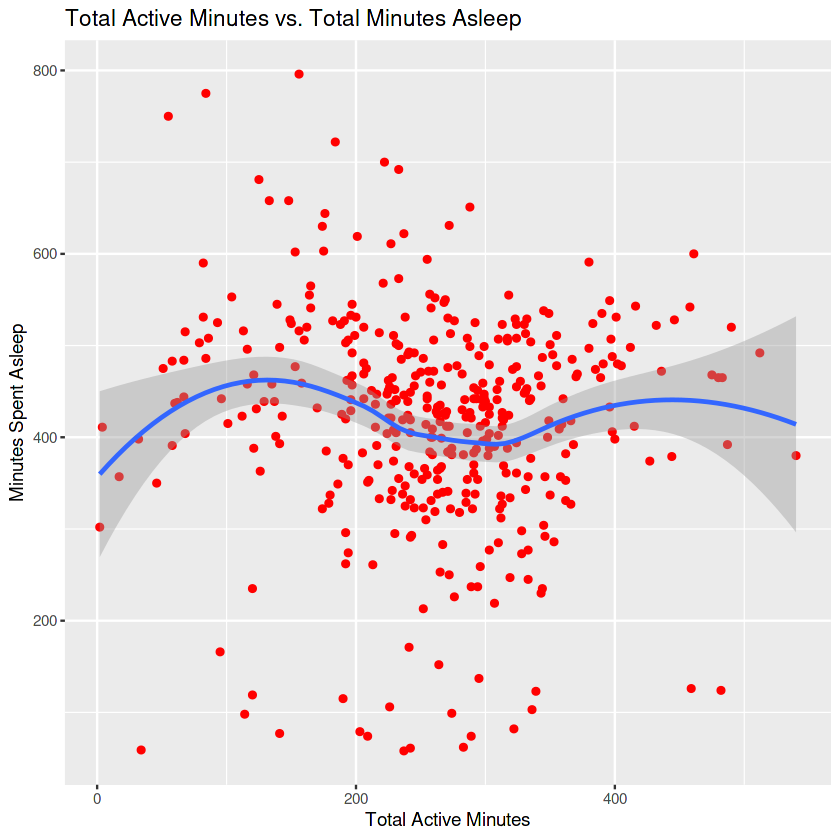

In [16]:
ggplot(data=activity_sleep, mapping=aes(TotalActiveMinutes,TotalMinutesAsleep))+
        geom_point(color="red") + geom_smooth() + 
        labs(title='Total Active Minutes vs. Total Minutes Asleep', x="Total Active Minutes", y='Minutes Spent Asleep')

It's hard to say that there is any noticeable correlation between total time spent active and how much sleep a person gets. The odd trendline is probably due to the small number of participants in the survey. Let's move on to other variables.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



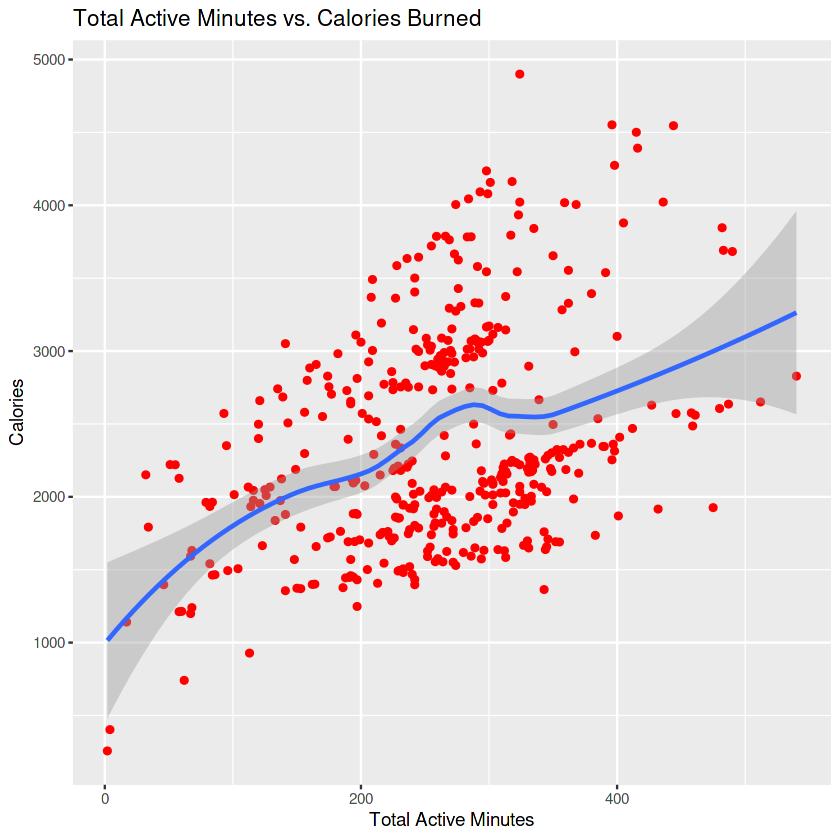

In [17]:
ggplot(data=activity_sleep, mapping=aes(x=TotalActiveMinutes, y=Calories)) +
    geom_point(color="red") +
    geom_smooth() +
    labs(title='Total Active Minutes vs. Calories Burned', x='Total Active Minutes')

We can establish with data that there is a positive linear relationship between activity and calories burned, meaning the more active you are, the more calories you will burn. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



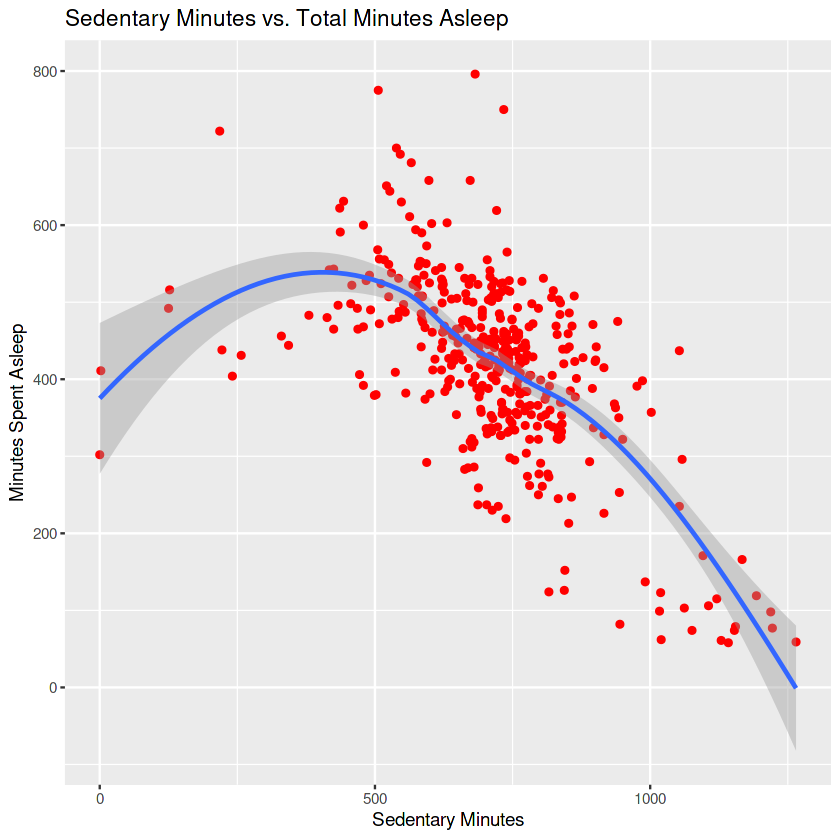

In [18]:
ggplot(data=activity_sleep, mapping=aes(SedentaryMinutes,TotalMinutesAsleep))+
    geom_point(color="Red") + 
    geom_smooth() + 
    labs(title='Sedentary Minutes vs. Total Minutes Asleep', x="Sedentary Minutes", y='Minutes Spent Asleep')

Here we can see a well defined negative relationship between Sedentary Minutes and Minutes Spent Asleep, **so it would be important for Bellabeat products promoting good sleeping habits to tell users to cut down on sedentary time.** 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



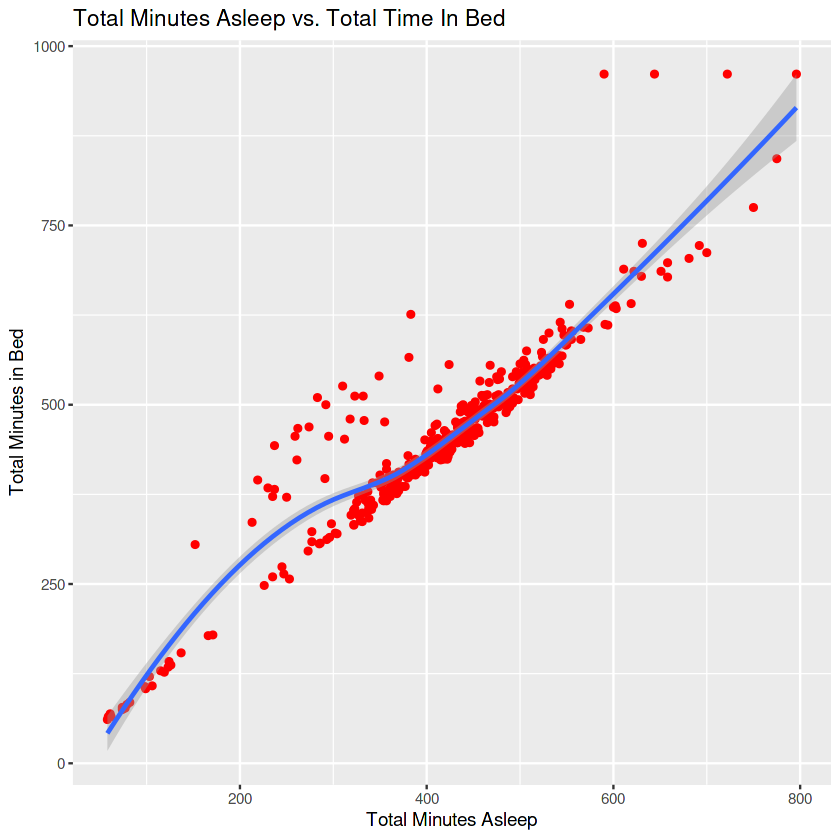

In [19]:
ggplot(data=activity_sleep, mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
    geom_point(color="red") + 
    geom_smooth() +
    labs(title='Total Minutes Asleep vs. Total Time In Bed', x="Total Minutes Asleep", y="Total Minutes in Bed")

It is clear that there is a very strong positive linear relationship between total minutes spent asleep and total minutes spent in bed, meaning the more time someone spends in bed, the more time they will be sleeping. That seems fairly obvious so let's keep digging for some deeper insights. 

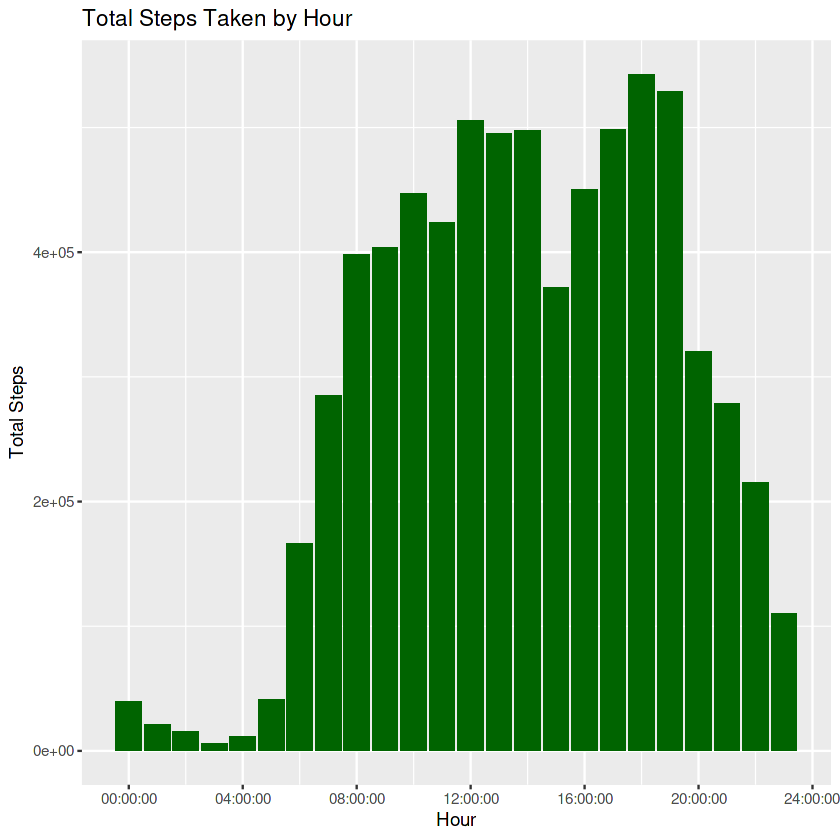

In [20]:
ggplot(data=hourly_merged, mapping=aes(x=Time, y=StepTotal)) + 
    geom_bar(stat='identity', fill='darkgreen') +
    labs(title='Total Steps Taken by Hour', x="Hour", y="Total Steps")                                                       

We can see that the participants walked the most from 5pm to 7pm, which makes sense because that is when working people tend to have free time to pursue other activities. **A smart device reminder to get some activity in during the time period before 5pm may increase user healthiness and satisfaction with Bellabeat products.**

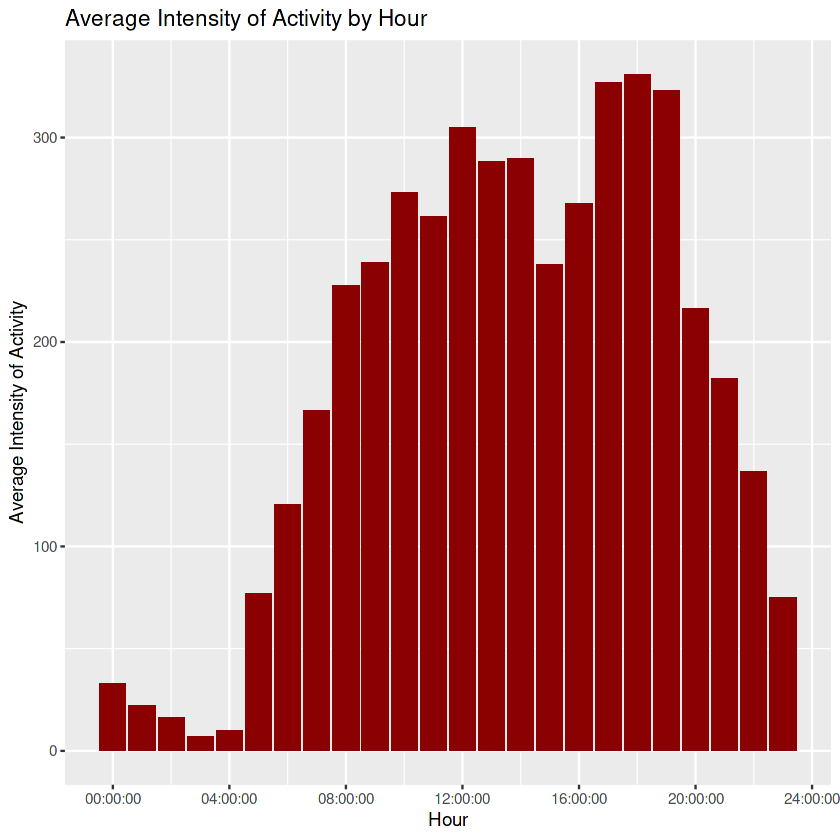

In [21]:
ggplot(data=hourly_merged, mapping=aes(x=Time, y=AverageIntensity)) + 
    geom_bar(stat='identity', fill='darkred')+
    labs(title="Average Intensity of Activity by Hour", x="Hour", y='Average Intensity of Activity')

A bar chart of hourly average intensities supports the findings from the previous plot that peak hours for activity are between 5pm and 7pm with a sharp dropoff at 8pm. Now let's take a look at the participants'activity over the course of a week.

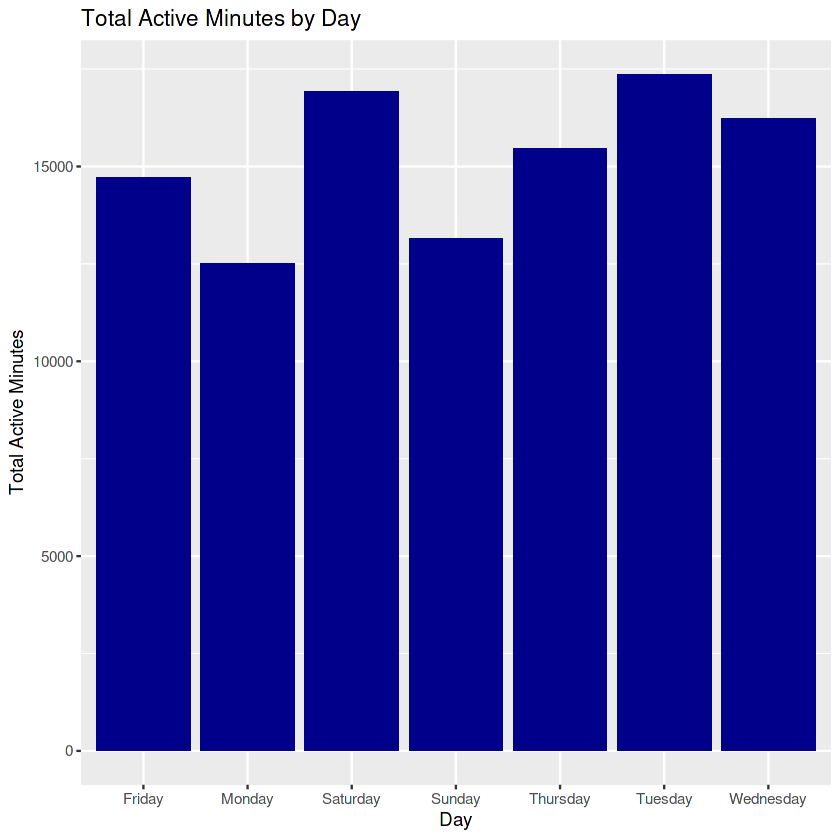

In [22]:
ggplot(data=activity_sleep, mapping=aes(x=Day, y=TotalActiveMinutes)) + 
    geom_bar(stat='identity', fill='darkblue') +
    labs(title="Total Active Minutes by Day", y='Total Active Minutes')

Tuesday, Saturday, Wednesday, and Thursday are the four days with the most minutes spent actively. **Bellabeat can program their devices to send reminders to work out on Mondays and Sundays to promote better overall fitness.**

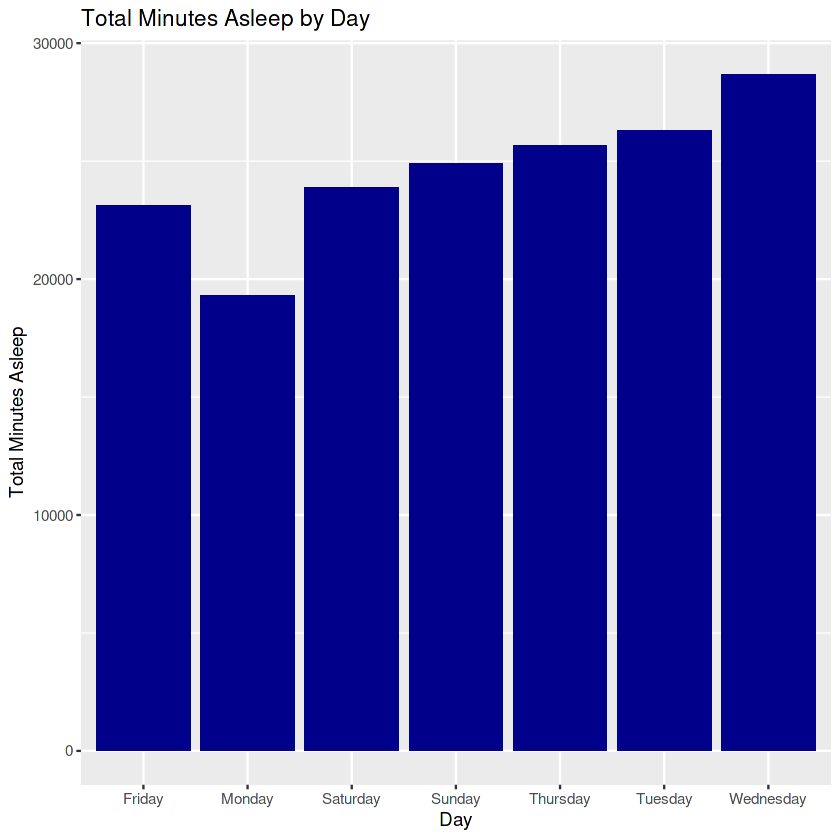

In [23]:
ggplot(data=activity_sleep, mapping=aes(x=Day, y=TotalMinutesAsleep)) + 
    geom_bar(stat='identity', fill='darkblue') +
    labs(title='Total Minutes Asleep by Day', y='Total Minutes Asleep')

The participants slept the most on Tuesdays, Wednesdays, and Thursdays, their most active days, which could point towards more activity yielding more sleep, but there is not enough data to make that conclusion just yet. Now let's identify which days the participants burned the most calories and took the most steps.

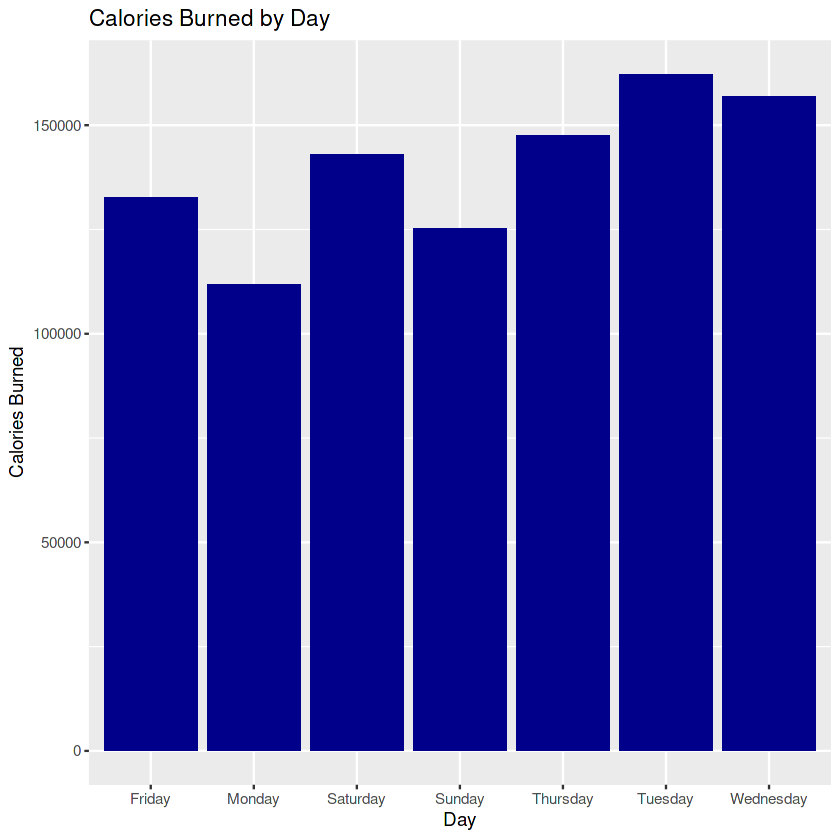

In [24]:
ggplot(data=activity_sleep, mapping=aes(x=Day, y=Calories)) + 
    geom_bar(stat='identity', fill='darkblue') +
    labs(title='Calories Burned by Day', y='Calories Burned')

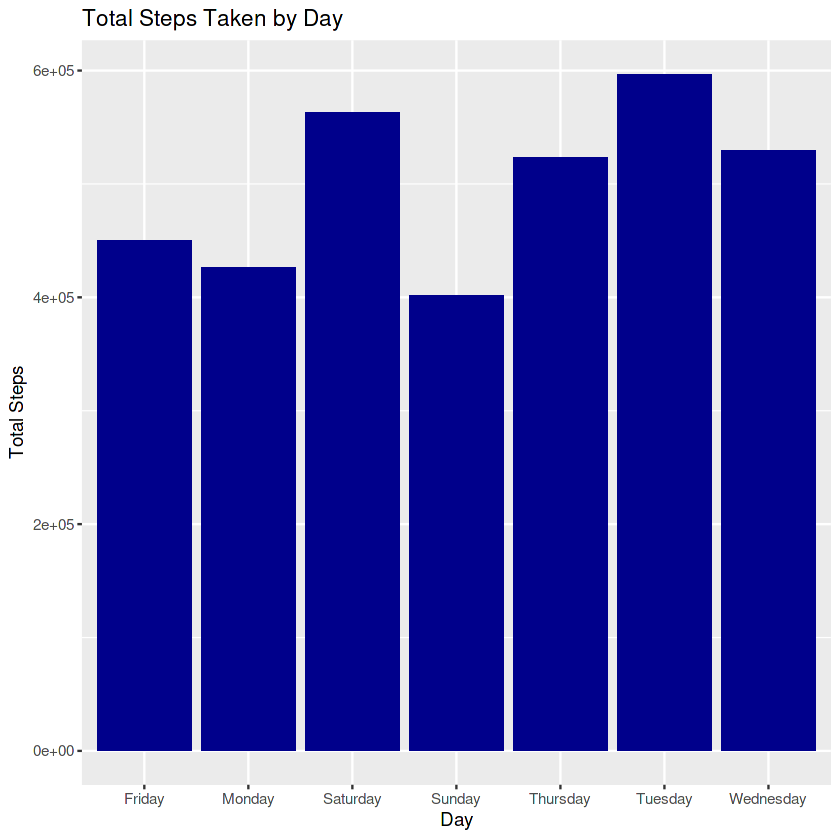

In [25]:
ggplot(data=activity_sleep, mapping=aes(x=Day, y=TotalSteps)) + 
    geom_bar(stat='identity', fill='darkblue') +
    labs(title='Total Steps Taken by Day', y='Total Steps')

Our earlier findings about Tuesday, Wednesday, Thursday, and Saturday being the days with the most activity have been reinforced by these two plots. We can clearly see that Tuesday, Wednesday, Thursday, and Saturday are the days with the most calories burned and steps taken. **Bellabeat can hone in on this by planning alerts for Monday, Friday, and Sunday to remind users to get active.**

## Key Findings

After analysis, the data has provided several key findings that can be used to inform a marketing strategy for the Bellabeat app, including:
* There is a positive linear relationship between total active minutes and calories burned. The more active you are, the more calories you will burn.
* There is a negative linear relationship between sedentary time and time spent asleep. The more sedentary you are, the less you will sleep.
* The participants were most active between 5-7pm and least active in the early morning when most are asleep.
* Tuesday, Wednesday, Thursday, and Saturday are the most active days of the week for the participants.

## Recommendations

Based on the above findings, my recommendations for a marketing strategy for the Bellabeat app are as follows:
* To cut down on sedentary time and promote healthy sleeping, the Bellabeat app should send a few reminders throughout the day to get 10 minutes of movement in between 9am and 5pm.
* Calories burned doesn't mean much if there is no calorie intake to compare, so the Bellabeat app should measure a user's daily calorie intake. 
* The Bellabeat app should send reminders to stay active primarily on Mondays, Fridays, and Sundays when users are least active. 
* **Start a survey for Bellabeat users to track their activity for further analysis. The data used in this analysis is just too limited to make further conclusions, especially because we don't know the genders or ages of the participants. As well, the data is from 2016, meaning the COVID lifestyle has probably drastically changed when and how users get active compared to when this data was collected.**